# Analyzing Performance on GRE Diagnostics Tests

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import PyPDF2, os, re
from pathlib import Path
import slate3k as slate

%matplotlib inline

In [2]:
## Setting CWD
cwd = os.getcwd()
root = Path(cwd).parents[0]
datadir = str(Path(root)) + str('/data')
outputdir = str(Path(root)) + str('/output')

Documents were screenshots of the answers that were put together as a pdf and then OCR:ed (via: https://www.sejda.com/ocr-pdf).

I also have some data from an ETS diagnostics test. However, the questions in that test was not timed or had labeled difficulty levels and categorized topics. I categorized the questions myself and assessed their difficulty level. For much of the notebook, I rely mainly on the Kaplan data.

# Table of Contents
* [Preparing data](#first-bullet)
* [Analyzing data: Kaplan](#second-bullet)
    - [Speed](#second-bullet-s2)
    - [Accuracy](#second-bullet-s3)
    - [Accuracy by Topic](#second-bullet-s4)
    - [Performance over Time](#second-bullet-s5)
* [Analyzing data: ETS and Kaplan](#third-bullet)

## Preparing data <a class="anchor" id="first-bullet"></a>

### Kaplan preptest 1

In [3]:
path_to_files = str(root) + "/kaplan_preptest1"
os.chdir(path_to_files)

documents = ["set1.pdf", "set2.pdf", "set3.pdf"]

question_setlist = []
question_list = []
difficulty_list = []
topic_list = []
seconds_list = []
sources = []

question_set = 0

for document in documents:
    
    question_set += 1
    
    with open(document,'rb') as fh:
        document = slate.PDF(fh, just_text=1)


    question = 0

    for page in document:
        
        
        question_setlist.append(int(question_set))
    
        question += 1
        question_list.append(int(question))

        difficulty = re.search(r'(DIFFICULTY:)(\w+)', str(page)).group(2)
        difficulty_list.append(difficulty)

        topic = re.search(r'(QUESTIONTOPIC:Quantitative-)(-)?(\w+)', str(page)).group(3)
        topic_list.append(topic)

        seconds = re.search(r'(SECOND\(S\)USED)(:)?(\d+)', str(page)).group(3)
        seconds_list.append(int(seconds))
        
        sources.append("Kaplan")

        print("Topic: " + str(topic) + "; Difficulty: " + str(difficulty) + "; Seconds: " + str(seconds))



Topic: SetsandStatistics; Difficulty: Low; Seconds: 35
Topic: Arithmetic; Difficulty: Medium; Seconds: 75
Topic: Proportions; Difficulty: Medium; Seconds: 63
Topic: SetsandStatistics; Difficulty: Medium; Seconds: 188
Topic: Geometry; Difficulty: Medium; Seconds: 210
Topic: Geometry; Difficulty: Low; Seconds: 67
Topic: NumberProperties; Difficulty: Medium; Seconds: 27
Topic: Geometry; Difficulty: Low; Seconds: 47
Topic: Arithmetic; Difficulty: High; Seconds: 107
Topic: Algebra; Difficulty: Medium; Seconds: 73
Topic: SetsandStatistics; Difficulty: Medium; Seconds: 58
Topic: Geometry; Difficulty: Low; Seconds: 12
Topic: SetsandStatistics; Difficulty: Medium; Seconds: 58
Topic: DataInterpretation; Difficulty: Medium; Seconds: 76
Topic: DataInterpretation; Difficulty: Medium; Seconds: 119
Topic: DataInterpretation; Difficulty: Medium; Seconds: 92
Topic: Geometry; Difficulty: Medium; Seconds: 224
Topic: SetsandStatistics; Difficulty: Medium; Seconds: 159
Topic: Arithmetic; Difficulty: Low; S

Topic: Geometry; Difficulty: High; Seconds: 165
Topic: Geometry; Difficulty: High; Seconds: 80
Topic: SetsandStatistics; Difficulty: High; Seconds: 81
Topic: NumberProperties; Difficulty: High; Seconds: 112
Topic: SetsandStatistics; Difficulty: High; Seconds: 48
Topic: Arithmetic; Difficulty: High; Seconds: 99
Topic: NumberProperties; Difficulty: Medium; Seconds: 54
Topic: Geometry; Difficulty: High; Seconds: 105
Topic: Geometry; Difficulty: Low; Seconds: 73
Topic: SetsandStatistics; Difficulty: High; Seconds: 223
Topic: Proportions; Difficulty: High; Seconds: 191
Topic: Geometry; Difficulty: High; Seconds: 115
Topic: DataInterpretation; Difficulty: High; Seconds: 167
Topic: DataInterpretation; Difficulty: Medium; Seconds: 140
Topic: DataInterpretation; Difficulty: High; Seconds: 72
Topic: Arithmetic; Difficulty: High; Seconds: 123
Topic: NumberProperties; Difficulty: High; Seconds: 118
Topic: NumberProperties; Difficulty: High; Seconds: 89
Topic: Algebra; Difficulty: High; Seconds: 21

Topic: Arithmetic; Difficulty: High; Seconds: 73
Topic: Proportions; Difficulty: High; Seconds: 186
Topic: SetsandStatistics; Difficulty: Medium; Seconds: 123
Topic: Arithmetic; Difficulty: High; Seconds: 186
Topic: Geometry; Difficulty: High; Seconds: 187
Topic: NumberProperties; Difficulty: High; Seconds: 33
Topic: Algebra; Difficulty: Low; Seconds: 36
Topic: Arithmetic; Difficulty: High; Seconds: 118
Topic: Geometry; Difficulty: High; Seconds: 72
Topic: Proportions; Difficulty: High; Seconds: 207
Topic: Proportions; Difficulty: Medium; Seconds: 138
Topic: Algebra; Difficulty: Medium; Seconds: 80
Topic: SetsandStatistics; Difficulty: Medium; Seconds: 111
Topic: DataInterpretation; Difficulty: Low; Seconds: 52
Topic: DataInterpretation; Difficulty: Medium; Seconds: 82
Topic: DataInterpretation; Difficulty: Low; Seconds: 43
Topic: Algebra; Difficulty: Low; Seconds: 33
Topic: SetsandStatistics; Difficulty: High; Seconds: 181
Topic: SetsandStatistics; Difficulty: High; Seconds: 126
Topic

In [4]:
set1_answers = [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
set2_answers = [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
set3_answers = [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]

set_answers = [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
               0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
               0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]

In [5]:
df_kaplan = pd.DataFrame({'Source': sources,
                   'Set': question_setlist,
                   'Question_nr': question_list,
                   'Topic': topic_list,
                   'Difficulty': difficulty_list,
                   'Seconds': seconds_list,
                   'Answer': set_answers})

### ETS preptest 1

In [6]:
path_to_ets_file = str(root) + "/ets_preptest1/question_data.xlsx"
df_ets = pd.read_excel(path_to_ets_file)

In [7]:
## Appending kaplan df with ets df
df = df_kaplan.append(df_ets, sort=True)

## Analyzing data <a class="anchor" id="second-bullet"></a>

In [8]:
df[['Difficulty','Answer','Seconds','Set']].groupby('Difficulty').mean()

,Answer,Seconds,Set
Difficulty,,,
High,0.463415,114.724138,2.219512
Low,0.913043,55.090909,1.434783
Medium,0.722222,107.500000,1.555556


In [9]:
df[['Answer','Seconds', 'Set']].groupby('Set').describe()

Answer                                           Seconds          \
     count   mean       std  min  25%  50%  75%  max   count    mean   
Set                                                                    
1     40.0  0.775  0.422902  0.0  1.0  1.0  1.0  1.0    20.0   94.90   
2     40.0  0.625  0.490290  0.0  0.0  1.0  1.0  1.0    20.0  104.55   
3     20.0  0.500  0.512989  0.0  0.0  0.5  1.0  1.0    20.0  104.70   

                                                   
           std   min    25%    50%     75%    max  
Set                                                
1    59.851483  12.0  58.00   75.5  121.75  224.0  
2    53.919506  15.0  72.75  102.0  127.25  223.0  
3    60.356921  27.0  49.75   96.5  148.75  207.0

In [10]:
df[['Answer','Seconds', 'Source']].groupby('Source').describe()

Answer                                           Seconds              \
        count   mean       std  min  25%  50%  75%  max   count        mean   
Source                                                                        
ETS      40.0  0.675  0.474342  0.0  0.0  1.0  1.0  1.0     0.0         NaN   
Kaplan   60.0  0.650  0.480995  0.0  0.0  1.0  1.0  1.0    60.0  101.383333   

                                                   
              std   min   25%   50%    75%    max  
Source                                             
ETS           NaN   NaN   NaN   NaN    NaN    NaN  
Kaplan  57.309476  12.0  58.0  85.5  132.0  224.0

### Speed <a class="anchor" id="second-bullet-s2"></a>

In [11]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

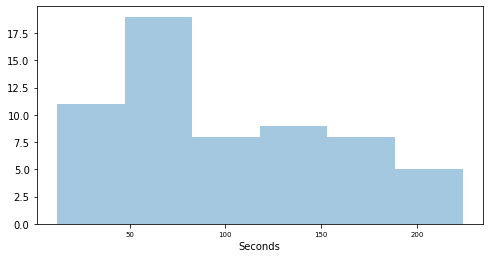

In [12]:
sns.distplot(df_kaplan['Seconds'], kde=False)

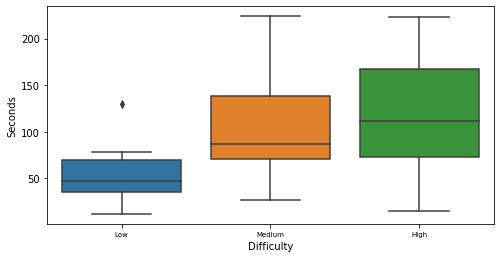

In [13]:
ax = sns.boxplot(x='Difficulty', y='Seconds', data=df_kaplan, orient="v")

From the figure above, as expected, the more difficult the question is, the longer it took me to answer.

### Accuracy <a class="anchor" id="second-bullet-s3"></a>

So I may be able to answer easy questions quickly, but do I get them right? Thankfully, I answer more right than wrong.

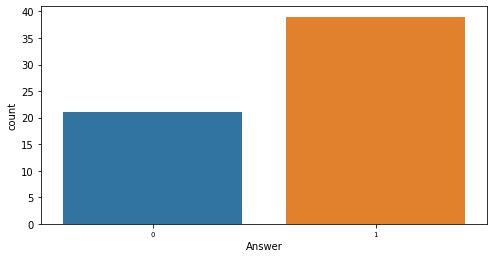

In [14]:
ax = sns.countplot(x='Answer', data=df_kaplan)

The figure below shows that I got most of the easy questions right. I also got many more of the medium-difficulty questions right than wrong. By the time I got to the hard questions, it was close to a 50-50.

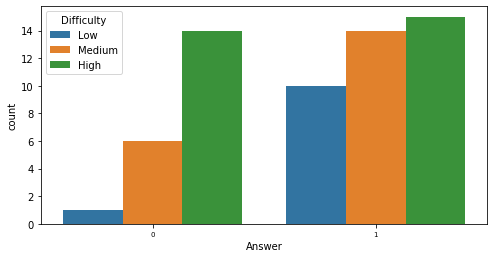

In [15]:
ax = sns.countplot(x='Answer', hue="Difficulty", data=df_kaplan)

### Accuracy by Topic <a class="anchor" id="second-bullet-s4"></a>

What topics do I mostly get right? There are a lot of Sets and Statistics questions, and I got a lot of them right. Next to that, I've done well in Data Interpretation and Algebra. Arithmetic, Number Properties and Geometry were trailing. It went horribly wrong with the Proportions questions. 

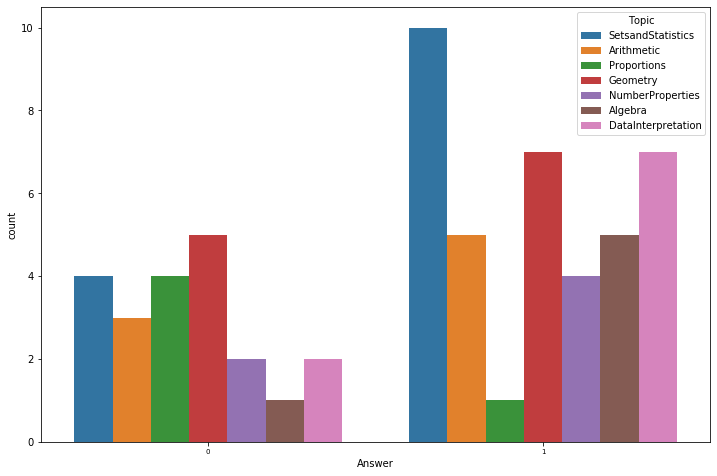

In [16]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Answer', hue="Topic", data=df_kaplan)

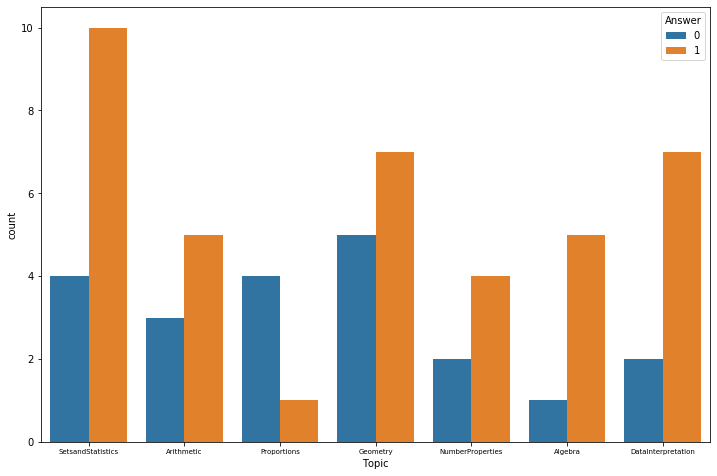

In [17]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Topic', hue="Answer", data=df_kaplan)

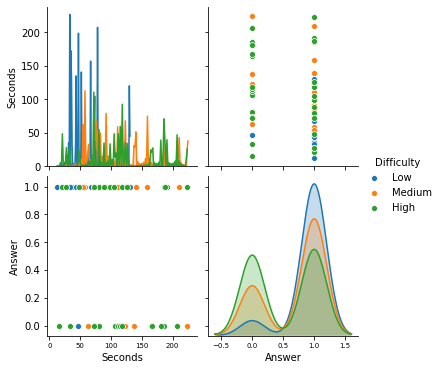

In [18]:
sns.pairplot(df_kaplan, hue="Difficulty", vars=["Seconds", "Answer"], diag_kws={'bw': 0.2})

### Performance over time <a class="anchor" id="second-bullet-s5"></a>

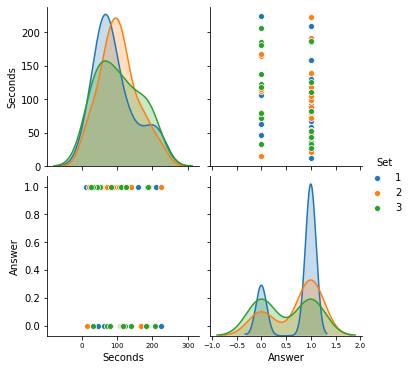

In [19]:
sns.pairplot(df_kaplan, hue="Set", vars=["Seconds", "Answer"])

## Analyzing data: ETS and Kaplan <a class="anchor" id="third-bullet"></a>

Let's look at the same thing but including the ETS scores.

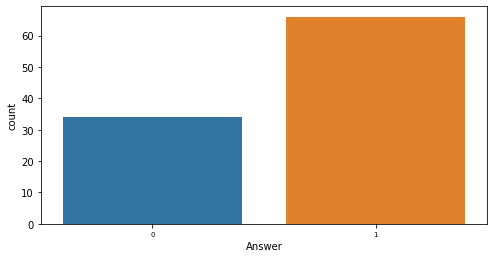

In [20]:
ax = sns.countplot(x='Answer', data=df)

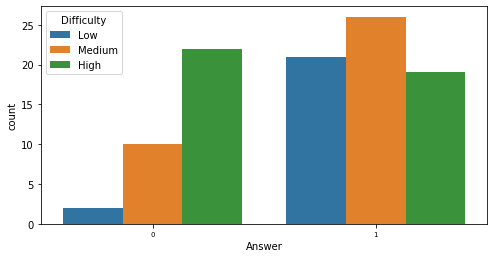

In [21]:
ax = sns.countplot(x='Answer', hue="Difficulty", data=df)

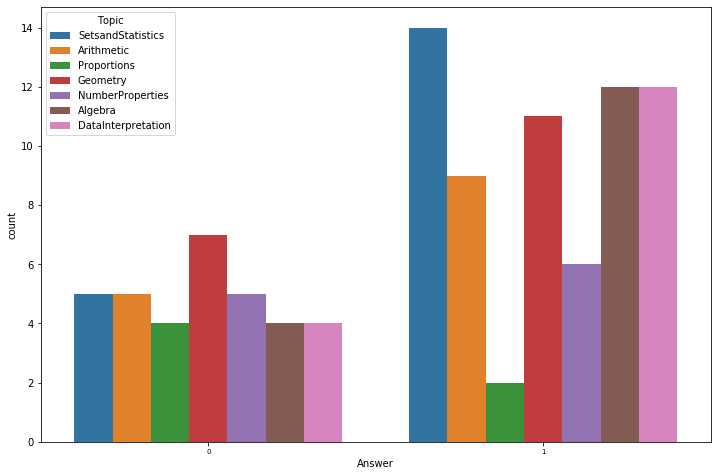

In [22]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Answer', hue="Topic", data=df)

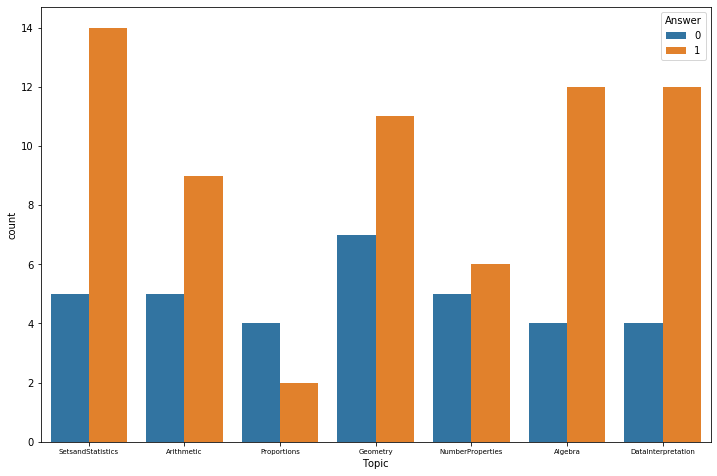

In [23]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Topic', hue="Answer", data=df)

# How did the GRE go?

Following my Kaplan and ETS diagnostic tests, I focused on learning easy rules of thumb for how to answer the different questions. Using flashcards that I made, I studied all the topics but focused on learning how to answer the Proportions and Geometry questions. 

My Quantitative Reasoning scaled score was 163 (out of 170) which put me in the 82nd percentile.

# End